In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/class-and-zoo-animal-dataset/class.csv
/kaggle/input/class-and-zoo-animal-dataset/zoo.csv


In [2]:
import numpy as np
import pandas as pd
import os


In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/class-and-zoo-animal-dataset/class.csv
/kaggle/input/class-and-zoo-animal-dataset/zoo.csv


In [4]:
zoo_df = pd.read_csv('/kaggle/input/class-and-zoo-animal-dataset/zoo.csv')
class_df = pd.read_csv('/kaggle/input/class-and-zoo-animal-dataset/class.csv')

In [5]:
print("Zoo Dataset:")
display(zoo_df.head())

Zoo Dataset:


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
print("\n Zoo Dataset Info:")
print(zoo_df.info())



 Zoo Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
Non

In [6]:
print("Class Dataset:")
display(class_df.head())

Class Dataset:


,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [8]:
print("\n Class Dataset Info:")
print(class_df.info())



 Class Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Class_Number                       7 non-null      int64 
 1   Number_Of_Animal_Species_In_Class  7 non-null      int64 
 2   Class_Type                         7 non-null      object
 3   Animal_Names                       7 non-null      object
dtypes: int64(2), object(2)
memory usage: 356.0+ bytes
None


In [9]:
class_df.rename(columns={
    'Class_Number': 'class_type',
    'Class_Type': 'class_name'
}, inplace=True)

In [10]:
zoo_df = pd.merge(zoo_df, class_df[['class_type', 'class_name']], on='class_type', how='left')

In [11]:
cols = ['animal_name', 'class_type', 'class_name'] + [col for col in zoo_df.columns if col not in ['animal_name', 'class_type', 'class_name']]
zoo_df = zoo_df[cols]

In [12]:
print("✅ Merged Zoo Dataset with Class Labels:")
display(zoo_df.head())

✅ Merged Zoo Dataset with Class Labels:


,animal_name,class_type,class_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,Mammal,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,Mammal,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,4,Fish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,Mammal,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,Mammal,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


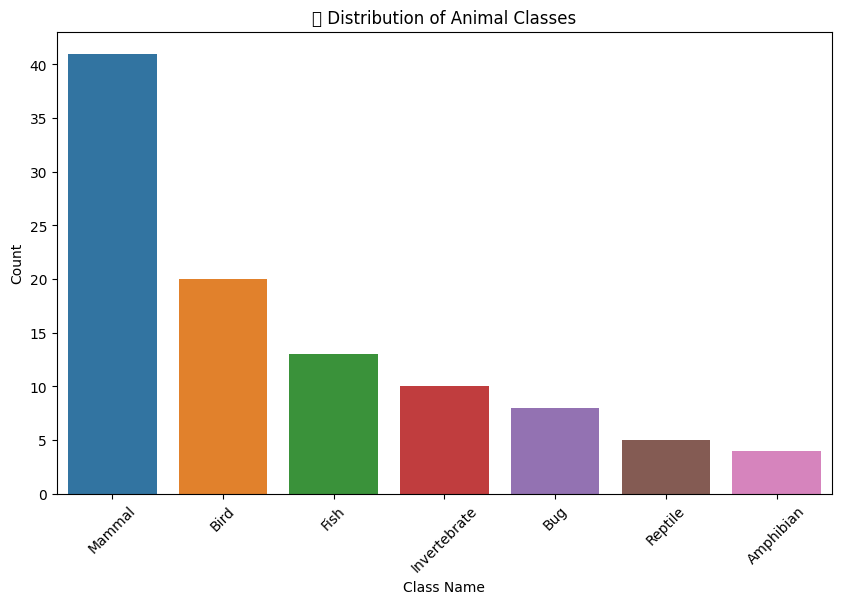

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data=zoo_df, x='class_name', order=zoo_df['class_name'].value_counts().index)
plt.title('🧬 Distribution of Animal Classes')
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_48/540151187.py:4: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


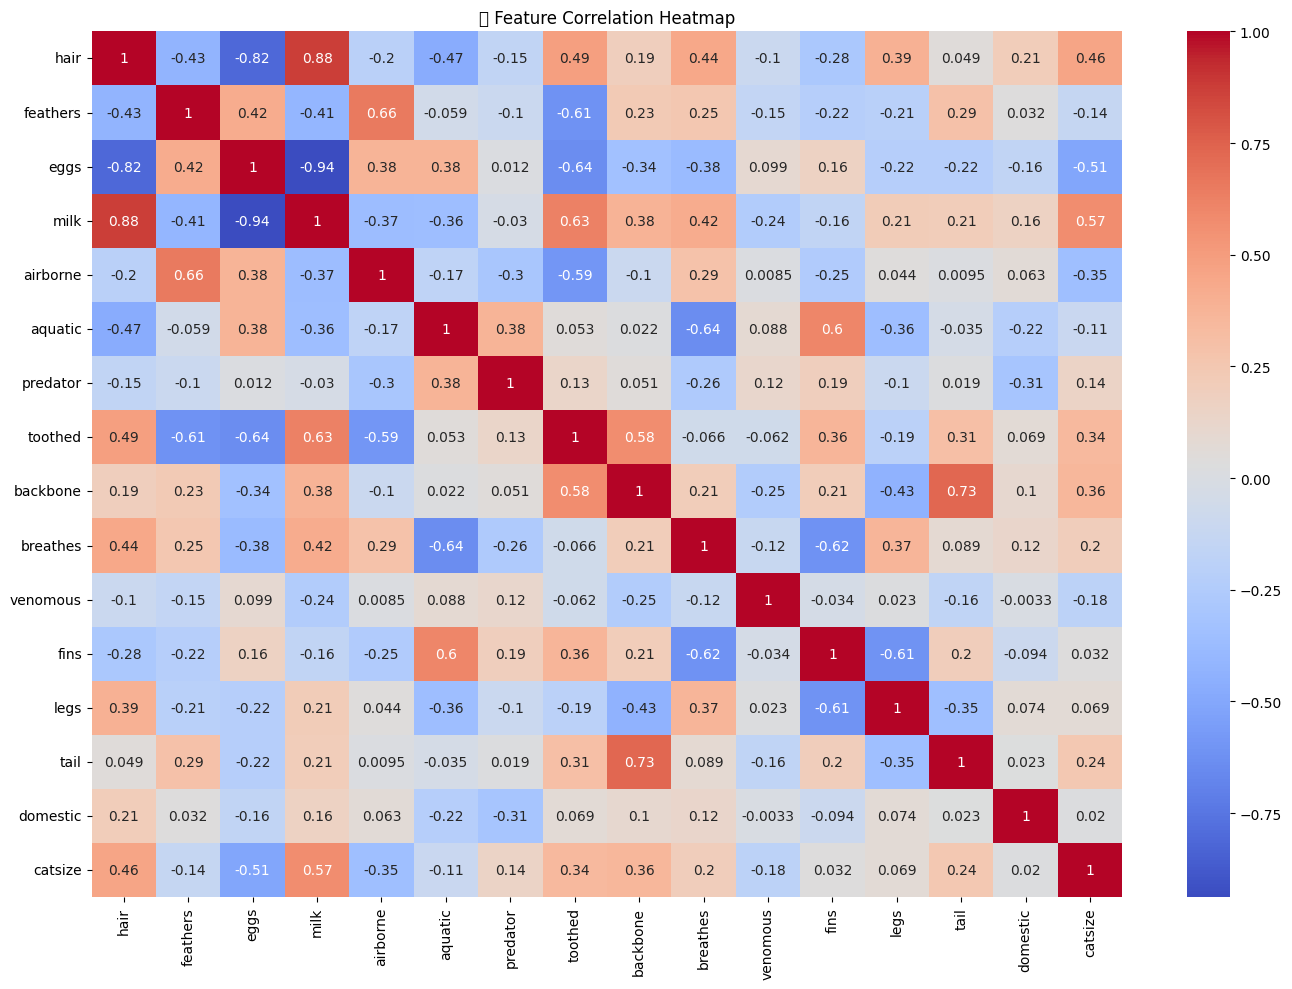

In [15]:
plt.figure(figsize=(14,10))
sns.heatmap(zoo_df.drop(['animal_name', 'class_type', 'class_name'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('🔗 Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

/tmp/ipykernel_48/1038225570.py:7: UserWarning: Glyph 129461 (\N{LEG}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129461 (\N{LEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


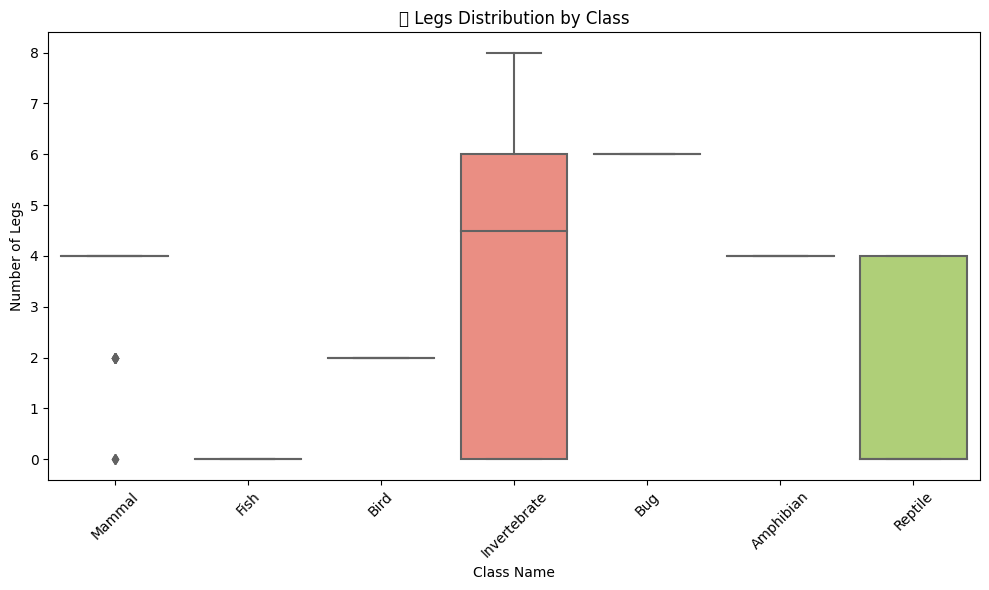

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=zoo_df, x='class_name', y='legs', palette='Set3')
plt.title('🦵 Legs Distribution by Class')
plt.xlabel('Class Name')
plt.ylabel('Number of Legs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
X = zoo_df.drop(['animal_name', 'class_type', 'class_name'], axis=1)
y = zoo_df['class_type']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [22]:
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))

✅ Accuracy Score: 0.9523809523809523


In [24]:
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))


📋 Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


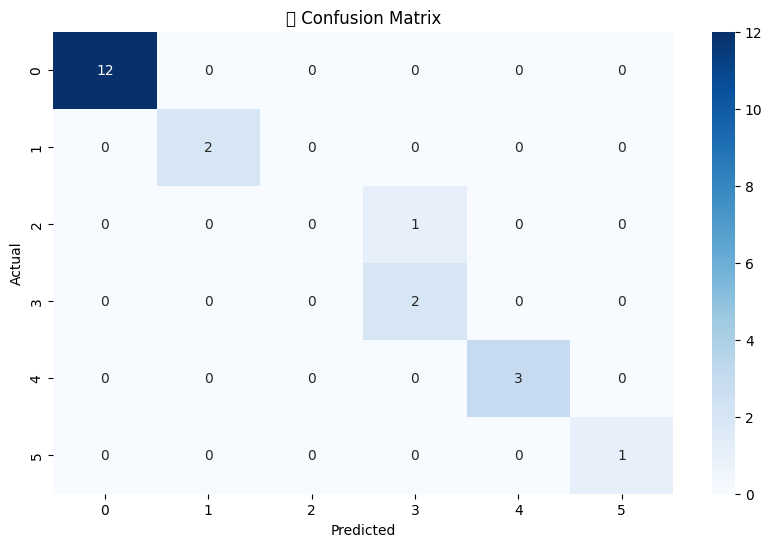

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('📊 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
import joblib

joblib.dump(model, '/kaggle/working/animal_classifier_model.pkl')

['/kaggle/working/animal_classifier_model.pkl']

In [28]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.to_csv('/kaggle/working/predictions.csv', index=False)